<a href="https://colab.research.google.com/github/Shreya4546/Cats_vs_Dogs_Classification/blob/main/cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d razinw/dog-vs-cat

 97% 399M/412M [00:02<00:00, 178MB/s]
100% 412M/412M [00:02<00:00, 154MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dog-vs-cat.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
     directory = '/content/dogvscat/train',
     labels = "inferred",
     label_mode ='int',
     batch_size=32,
     image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
     directory = '/content/dogvscat/train',
     labels = "inferred",
     label_mode ='int',
     batch_size=32,
     image_size=(256,256)
)

Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
#Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
#CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation ='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D (pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation ='relu'))
model.add(Dense(64, activation ='relu'))
model.add(Dense(1, activation ='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 128)      

In [ ]:
model.compile(optimizer ='adam',loss = 'binary_crossentropy', metrics =['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
16/16 [==============================] - 17s 563ms/step - loss: 0.8488 - accuracy: 0.4920 - val_loss: 0.6840 - val_accuracy: 0.5420
Epoch 2/10
16/16 [==============================] - 14s 701ms/step - loss: 0.6935 - accuracy: 0.5880 - val_loss: 0.6887 - val_accuracy: 0.5060
Epoch 3/10
16/16 [==============================] - 17s 806ms/step - loss: 0.6954 - accuracy: 0.5040 - val_loss: 0.6757 - val_accuracy: 0.5280
Epoch 4/10
16/16 [==============================] - 14s 691ms/step - loss: 0.6541 - accuracy: 0.5880 - val_loss: 0.5896 - val_accuracy: 0.6860
Epoch 5/10
16/16 [==============================] - 17s 905ms/step - loss: 0.6080 - accuracy: 0.6740 - val_loss: 0.5483 - val_accuracy: 0.7680
Epoch 6/10
16/16 [==============================] - 18s 903ms/step - loss: 0.5268 - accuracy: 0.7460 - val_loss: 0.4615 - val_accuracy: 0.7480
Epoch 7/10
16/16 [==============================] - 17s 907ms/step - loss: 0.4307 - accuracy: 0.8000 - val_loss: 0.3028 - val_accuracy: 0.8660

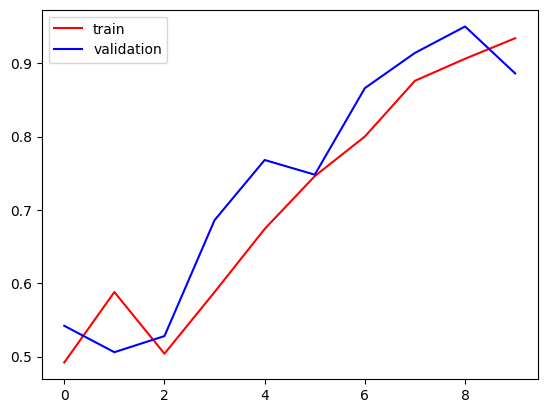

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

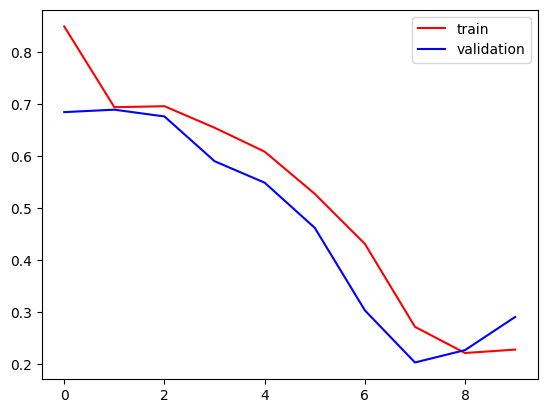

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/dog.jpg')

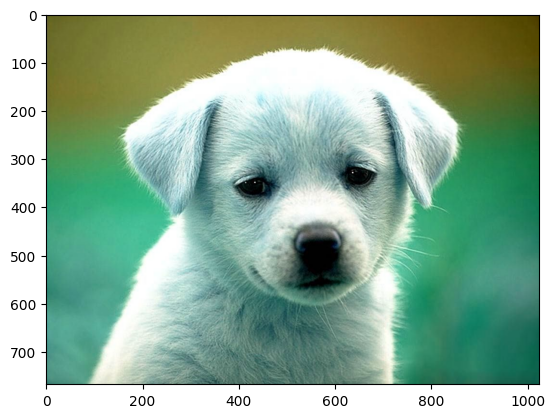

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(768, 1024, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)